<a href="https://colab.research.google.com/github/ansehoon1999/hands-on_practice/blob/main/hands_on_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오토인코더

지도 학습 VS 비지도 학습

- 분류 모델들은 대다수 정답이 존재하는 데이터들임, 미리 정의된 데이터

- 주어진 데이터들을 구분할 수 있는 특정 패턴을 찾아야한다.미리 정의되지 않은 데이터

  - ex) Clustering(군집화): 명확히 구분되지 않은 데이터들을 비슷한 특징을 갖는 데이터들끼리 묶어 주는 것



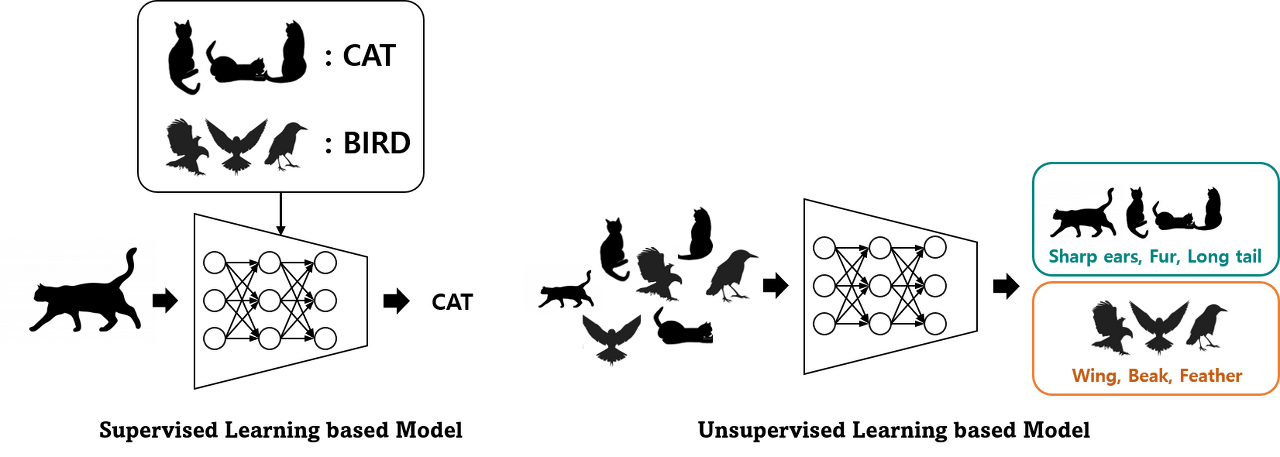

오토 인코더 모델: 비지도 학습을 진행하는 대표 네트워크

특징
- 입력과 출력이 같은 구조
- 병목 구조 (latent variable, feature, hidden representation)
- Encoder-Deocder 구조
  - Encoder: 입력 데이터를 받아 압축
  - Decoder: 압축된 표현을 풀어 출력물 생성

- 과정
  - Input Data를 Encoder Network 에 넣어 압축된 특징의 벡터 z, 
  - 압축된 z벡터로부터 Decoder Network를 통해 Input과 유사한 Output Data 생성

※ 정답이 없는 x 데이터만으로 의미를 추출하기 위하여 **x를 입력받아 다시 x를 복원**할 수 있는 신경망을 학습하는 것이 핵심이다.

※ 오토 인코더의 핵심은 **입력, 출력의 크기는 같지만** 중간으로 갈 수록 신경망의 차원이 줄어들면서, 입력 특징이 압축되는 잠재 변수(latent variable)를 얻을 수 있게 된다. 이 압축 **데이터는 의미(context, semantic...)의 압축이 일어나게 되며** 이는 단순히 사이즈를 줄이는 압축이 아닌, **중요한 정보만을 담는다**는 압축을 의미한다. 이는 다른 의미론 필연적으로 **불필요한 정보에 대해 정보 손실과정**이 일어난다는 의미로 볼 수 있다.



https://yjs-program.tistory.com/163

In [2]:
import torch
import torchvision
import torch.nn.functional as F
from torch import nn, optim
from torchvision import transforms, datasets

import matplotlib.pyplot as plt # Matplotlib: 이미지 출력을 돕는 모듈
from mpl_toolkits.mplot3d import Axes3D # Axes3D: Matplorlib에서 3차원 plot을 그리는 용도
from matplotlib import cm # Data 포인트에 색상입히는 용도
import numpy as np # Numpy 행렬 변환

In [3]:
EPOCH = 50
BATCH_SIZE = 64
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("Using Device:", DEVICE)


trainset = datasets.FashionMNIST(
    root = './data',
    train = True,
    download = True,
    transform = transforms.ToTensor()
)

train_loader = torch.utils.data.DataLoader(
    dataset = transet,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = 2
)

Using Device: cpu



Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


NameError: ignored

In [5]:
class Autoencoder(nn.Module) :
  def __init__(self) :
    super(Autoencoder, self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.ReLU(),
        nn.Linear(12, 3),
    )

    self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # 픽셀당 0과 1 사이로 값을 출력합니다
        )
     

def forward(self, x) :
  encoded = self.encoder(x)
  decoded = self.decoder(encoded)
  return encoded, decoded


In [ ]:
autoencoder = Autoencoder().to(DEVICE)
optimizer = torch.opttim.Adam(autoencoder.parameters(), lr = 0.005)
criterion = nn.MSELoss()

view_data = transet.data[:5].view(-1, 2220)
view_data = view_data.type(torch.FloatTensor)/255



In [ ]:
def train(autoencoder, train_loader) :
  autoencoder.train()

  for step, (x, label) in enumerate(train_loader) :
    x = x.view(-1, 28 *28).to(DEVICE)
    y = x.view(-1, 28 *28).to(DEVICE)
    label = label.to(DEVICE)

    encoded, decoded =autoencoder(x)
    loss = criterion(decoded, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

for epoch in range(1, EPOCH+1) :
  train(autoencoder, train_loader)

  test_x = view_data.to(DEVICE)
  _, decoded_data = autoencoder(test_x)

  f, a  =plt.subplots(2, 6, figsize= (5, 2))
  print("[Epoch {}]".format(epoch))

  for i in range(5) :
    img = np.reshape(view_data.data.numpy()[i], (28, 28))
    a[0][i].imshow(img, cmap = 'gray')
    a[0][i].set_xticks(());
    a[0][i].set_yticks(())

noise 제거



In [6]:
def add_noise(img) :
  noise = torch.randn(img.size()) * 0.2
  noisy_img = img + noise
  return noisy_img


In [ ]:
def train(autoencoder, train_loader):
    autoencoder.train()
    avg_loss = 0
    for step, (x, label) in enumerate(train_loader):
        noisy_x = add_noise(x)  # 입력에 노이즈 더하기
        noisy_x = noisy_x.view(-1, 28*28).to(DEVICE)
        y = x.view(-1, 28*28).to(DEVICE)

        label = label.to(DEVICE)
        encoded, decoded = autoencoder(noisy_x)

        loss = criterion(decoded, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss += loss.item()
    return avg_loss / len(train_loader)

In [ ]:
testset = datasets.FashionMNIST(
    root = './.data/',
    train = False,
    download = True,
    transform = transforms.ToTensor()

)

sample_data = testset.data[0].view(-1, 28*28)
sample_data = sample_data.type(torch.FloatTensor)/255.

original_x = sample_data[0]
noisy_x = add_noise(original_x).to(DEVICE)
_, recovered_x = autoencoder (noisy_x)

f, a = plt.subplots(1, 3, figsize(15, 15))

#시각화를 위해 넘파이 행렬로 바꿔줍니다.
original_img = np.reshape(original_x.to("cpu").data.numpy(), (28, 28))
noisy_img = np.reshape(noisy_x.to("cpu").data.numpy(), (28, 28))
recovered_img = np.reshape(recovered_x.to("cpu").data.numpy(), (28, 28))

# 원본 사진
a[0].set_title('Original')
a[0].imshow(original_img, cmap='gray')

# 오염된 원본 사진
a[1].set_title('Noisy')
a[1].imshow(noisy_img, cmap='gray')

# 복원된 사진
a[2].set_title('Recovered')
a[2].imshow(recovered_img, cmap='gray')

plt.show()

# GAN(Generative Adversarial Net)

http://intelligence.korea.ac.kr/members/wschoi/seminar/tutorial/mnist/pytorch/gan/GAN-%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC/

In [12]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np

# 하이퍼파라미터
EPOCHS = 500
BATCH_SIZE = 100
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("Using Device:", DEVICE)

Using Device: cuda


In [13]:
# Fashion MNIST 데이터셋
trainset = datasets.FashionMNIST(
    './.data',
    train=True,
    download=True,
    transform=transforms.Compose([
       transforms.ToTensor(),
       transforms.Normalize((0.5,), (0.5,))
    ])
)
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True
)


Extracting ./.data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw




Extracting ./.data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw




Extracting ./.data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw




Extracting ./.data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



In [16]:
# 생성자 (Generator)
G = nn.Sequential(
        nn.Linear(64, 256),
        nn.ReLU(),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Linear(256, 784),
        nn.Tanh())

In [15]:
# 판별자 (Discriminator)
D = nn.Sequential(
        nn.Linear(784, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 1),
        nn.Sigmoid())

In [18]:
# 모델의 가중치를 지정한 장치로 보내기
# CUDA(GPU) / CPU
D = D.to(DEVICE)
G = G.to(DEVICE)

# 이진 크로스 엔트로피 (Binary cross entropy) 오차 함수와
# 생성자와 판별자를 최적화할 Adam 모듈
criterion = nn.BCELoss()
d_optimizer = optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = optim.Adam(G.parameters(), lr=0.0002)

In [19]:
total_step = len(train_loader)
for epoch in range(EPOCHS):
    for i, (images, _) in enumerate(train_loader):
        images = images.reshape(BATCH_SIZE, -1).to(DEVICE)
        
        # '진짜'와 '가짜' 레이블 생성
        real_labels = torch.ones(BATCH_SIZE, 1).to(DEVICE)# [1,1,1...]
        fake_labels = torch.zeros(BATCH_SIZE, 1).to(DEVICE)# [0.0,0...]
        
        # 판별자가 진짜 이미지를 진짜로 인식하는 오차를 예산
        outputs = D(images) # 진짜 이미지를 discriminator의 입력으로 제공
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs
        
        # 무작위 텐서로 가짜 이미지 생성
        z = torch.randn(BATCH_SIZE, 64).to(DEVICE)
        fake_images = G(z) #G의 입력으로 랜덤 텐서 제공, G가 fake image 생성
        
        # 판별자가 가짜 이미지를 가짜로 인식하는 오차를 계산
        outputs = D(fake_images)# 가짜 이미지를 discriminator의 입력으로 제공
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs
        
        # 진짜와 가짜 이미지를 갖고 낸 오차를 더해서 Discriminator의 오차 계산
        d_loss = d_loss_real + d_loss_fake

        #------ Discriminator 학습 ------#
        # 역전파 알고리즘으로 Discriminator의 학습을 진행
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()# Discriminator 학습
        
        # 생성자가 판별자를 속였는지에 대한 오차(Generator의 loss)를 계산
        fake_images = G(z)
        outputs = D(fake_images) #한번 학습한 D가 fake image를 
        g_loss = criterion(outputs, real_labels)

         #------ Generator 학습 ------#
        
        # 역전파 알고리즘으로 생성자 모델의 학습을 진행
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
    # 학습 진행 알아보기
    print('Epoch [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
          .format(epoch, EPOCHS, d_loss.item(), g_loss.item(), 
                  real_score.mean().item(), fake_score.mean().item()))

Epoch [0/500], d_loss: 0.0439, g_loss: 5.2099, D(x): 0.99, D(G(z)): 0.03
Epoch [1/500], d_loss: 0.0569, g_loss: 5.8250, D(x): 0.97, D(G(z)): 0.01
Epoch [2/500], d_loss: 0.0368, g_loss: 6.2992, D(x): 0.98, D(G(z)): 0.01
Epoch [3/500], d_loss: 0.0095, g_loss: 6.8554, D(x): 1.00, D(G(z)): 0.00
Epoch [4/500], d_loss: 0.1041, g_loss: 6.5997, D(x): 0.98, D(G(z)): 0.04
Epoch [5/500], d_loss: 0.0947, g_loss: 5.4013, D(x): 0.96, D(G(z)): 0.03
Epoch [6/500], d_loss: 0.1618, g_loss: 5.6133, D(x): 0.94, D(G(z)): 0.02
Epoch [7/500], d_loss: 0.2204, g_loss: 4.0059, D(x): 0.99, D(G(z)): 0.16
Epoch [8/500], d_loss: 0.1783, g_loss: 4.9539, D(x): 0.95, D(G(z)): 0.05
Epoch [9/500], d_loss: 0.2350, g_loss: 4.3514, D(x): 0.95, D(G(z)): 0.06
Epoch [10/500], d_loss: 0.2073, g_loss: 4.3224, D(x): 0.97, D(G(z)): 0.12
Epoch [11/500], d_loss: 0.0920, g_loss: 4.7302, D(x): 0.97, D(G(z)): 0.04


KeyboardInterrupt: ignored

In [ ]:
z = torch.randn(BATCH_SIZE, 64).to(DEVICE)
fake_images = G(z)

for i in range(10) :
  fake_images_img = np.reshape(fake_images.data.cpu().numpy()[i], (28, 28))
  plt.imshow(fake_images_img, cmap='gray')
  plt.show()

  